#**Introduction：**
Team members: Xiaonan Liu, Huiyin Chen, Simeng Shen

Movies are one of the most common forms of entertainment in our lives. However, while they are exciting and interesting to watch, it often involves a lot of risks to produce them. By exploring the potential factors influencing their successes, we get to predict if they are going to be a big hit, or a huge let-down.

The main metric for success is rating average, which comes from the IMBD/TMBD votings. We also used the metric popularity(number of ratings) to quantify success level of movies.

Although revenue is the most intuitive way of measuring sucess, it is very difficult to find for most movies, since they are either too low in box office performance, or unable to find since the production company chose not to share it to the public. 

# **Data Loading**

Link to the Movie Dataset: https://www.kaggle.com/rounakbanik/the-movies-dataset?select=movies_metadata.csv

Link to additional dataset we used: https://www.kaggle.com/jayaudaykmar/moviesdataset

This dataset is comprised of 26 million ratings on 45,000 movies from 27,000 users.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime
import ast
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
from google.colab import drive

drive.mount('/content/gdrive')
credit_df  = pd.read_csv("/content/gdrive/MyDrive/CIS545/credits.csv")
link_df  = pd.read_csv("/content/gdrive/MyDrive/CIS545/links.csv")
movies_metadata  = pd.read_csv("/content/gdrive/MyDrive/CIS545/movies_metadata.csv")
ratings_df = pd.read_csv("/content/gdrive/MyDrive/CIS545/ratings.csv")
keywords_df = pd.read_csv("/content/gdrive/MyDrive/CIS545/keywords.csv")
gorss = pd.read_csv("/content/gdrive/MyDrive/CIS545/movies_1970_2018.csv")

Mounted at /content/gdrive


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (10) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


A brief intro to our data sets:

In [3]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [4]:
movies_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [5]:
keywords_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46419 entries, 0 to 46418
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        46419 non-null  int64 
 1   keywords  46419 non-null  object
dtypes: int64(1), object(1)
memory usage: 725.4+ KB


In [6]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45476 entries, 0 to 45475
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   cast    45476 non-null  object
 1   crew    45476 non-null  object
 2   id      45476 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.0+ MB


In [7]:
link_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45843 entries, 0 to 45842
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  45843 non-null  int64  
 1   imdbId   45843 non-null  int64  
 2   tmdbId   45624 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.0 MB


In [8]:
ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26024289 entries, 0 to 26024288
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 794.2 MB


#**Data Cleaning**

We realized that ratings_df and link_df may not be that useful to us, since both refer to specific id of users and IMDB/TMDB. And movies_metadata, credit_df, and keywords_df might provide some useful information to use so we will merge those datasets afterwards.

### Convert Data Types & Drop Missing Values

We want to first convert data types to the appopriate ones, and drop missing values.

In [9]:
movies_metadata["id"] = pd.to_numeric(movies_metadata["id"], errors='coerce')
movies_metadata["popularity"] = pd.to_numeric(movies_metadata["popularity"], errors='coerce')
movies_metadata["budget"] = pd.to_numeric(movies_metadata["budget"], errors='coerce')

## take a look for those movies with wrong format of data
## there is only a few so we zcan delete them
movies_metadata[movies_metadata["id"].isnull()]
movies = movies_metadata[~movies_metadata["id"].isnull()]

### Convert Datetime

For release_date, we want to convert the date into datetime year, month, and date.

In [ ]:
movies['cleaned_release_date'] = pd.to_datetime(movies['release_date'])

movies['release_year'] = movies['cleaned_release_date'].apply(lambda x : x.year)
movies['release_month'] = movies['cleaned_release_date'].apply(lambda x : x.month)
movies['release_day'] = movies['cleaned_release_date'].apply(lambda x : x.day)

movies = movies.drop(['release_date', 'cleaned_release_date'], axis=1)

### Merge Dataframes

We now want to merge movies with credit_df based on their id to create an integrated dataframe total. Since credit_df contains the information about cast and crew.

In [11]:
movies['id'] = movies['id'].astype(int)
credit_df['id'] = credit_df['id'].astype(int)
total = pd.merge(movies, credit_df, on = "id", how = "left")

###Spliting Cast and Crew

The columns for cast, crew, production company and language are all in stored in string. To better handle them later, we want to convert string to dictionary for future feature engineering.

In [12]:
total.loc[total['production_companies'].isnull(), "production_companies"] = "[]"
total.loc[total['production_countries'].isnull(), "production_countries"] = "[]"
total.loc[total['cast'].isnull(), "cast"] = "[]"
total.loc[total['crew'].isnull(), "crew"] = "[]"

total['cast'] = total['cast'].apply(lambda x: ast.literal_eval(x))
total['crew'] = total['crew'].apply(lambda x: ast.literal_eval(x))
total['production_companies'] = total['production_companies'].apply(lambda x: ast.literal_eval(x))
total['production_countries'] = total['production_countries'].apply(lambda x: ast.literal_eval(x))
total['genres'] = total['genres'].apply(lambda x: ast.literal_eval(x))

### Drop Irrelevant Sections

For information that are irrelevant (such as homepage, poster_path, etc.) to our project, we decide to drop them.

For columns like "adult" which indicates wheather it is R rated, there are less than 1% of data not missing. Thus, we drop them as well. 

The original title refers to the title of the movie in the native language in which the movie was shot. It does not give us more information, thus also dropped.


In [13]:
## drop some seemingly irrelevant variables
total = total.drop(columns=["adult", "homepage","status", "imdb_id", "poster_path", "spoken_languages", "belongs_to_collection"])

### Possible Matric to determine the success of movies: ROI

Here we want to introduce a new metrics : ROI (Return on Investment), since whether the movie's box office performs well and lead to high return on investment is what the investors care about.

In [14]:
total["ROI"] = (total["revenue"] - (total["budget"]+1))/(total["budget"] + 1)

### Merging with rating_df

We will merge rating from rating_df to our main dataframe so that we have more information on rating and rating counts.

In [15]:
rating = ratings_df[['movieId', 'rating']]
rating_group = rating.groupby(['movieId']).agg(['count', 'mean']).sort_values(by='movieId')
rating_group.columns = ['count', 'mean']

Since ratings_df and our main dataframe uses different movie ids, we will link these 2 dataframes by link_df

In [16]:
rating_update = pd.merge(rating_group, link_df, how = 'inner', left_on='movieId', right_on='movieId')
rating_update = rating_update[['tmdbId', 'count', 'mean']]
rating_update.rename(columns={'count': 'rating_count', 'mean': 'rating_average'}, inplace=True)

Now, we replace the updated ratings.

In [17]:
total.drop(['vote_count', 'vote_average'], axis=1, inplace=True)
total = pd.merge(total, rating_update, how = 'inner', left_on='id', right_on='tmdbId')

### Clean Titles

For those that has a different original title and current titile, drop original titles, and convert title and overview columns to string for further process

In [18]:
total[total['original_title'] != total['title']][['title', 'original_title']].head()
total = total.drop('original_title', axis=1)

total['title'] = total['title'].astype('str')
total['overview'] = total['overview'].astype('str')

### Revenue Updates

We are aware that lots of revenue data in our dataframe is missing. Hence, we found another external dataset (https://data.world/typhon/wikipedia-movie-data-from-1970-2018) with more revenue information.

In this section, we will first clean up the revenue showed in the dataset, then merge with our original dataframe. This join is able to bring around 2,000 revenue updates.

In [19]:
def strip_rev(x):
  x = str(x)
  x = x.replace("$", "")
  ret = 0
  for i in x.split():
    try:
      ret = float(i)
      break
    except:
      continue
  if "million" in x:
    return ret * 1000000
  elif "billion" in x:
    return ret * 1000000000
  else:
    return ret

gorss['cleaned_rev'] = gorss['gross'].apply(lambda x : strip_rev(x))

In [20]:
gorss = gorss[['name', 'cleaned_rev']]
gorss = gorss.dropna(how = 'any')

total = pd.merge(total, gorss, left_on='title', right_on='name', how = 'left')
total = total.drop(['name'], axis=1)
total['revenue'] = np.nanmax(total[['revenue', 'cleaned_rev']], axis=1)

total = total.drop(['cleaned_rev'], axis=1)

#total2[total2['final_rev'] < total2['revenue']][['revenue','final_rev']]

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: All-NaN axis encountered
  


# Using Word2Vec to Compute Star Power

### Word2Vec for Cast, Crew, Genre, and Production Companies

Since cast, crew, genre, and production companies are all categorical values, we first tried one-hot encoding to fit the data for machine learning.

However, we later found out that one-hot encoding is not the best fit for categories like crew, cast, and production companies, since there are a lot of values in each feature, and there is a great chance that a movie is involved with multiple values for every feature. Hence, we needed to find a way to represent the star power and thus decided to adopt Word2Vec to train these categorical values. Word2Vec was originally used to produce word embeddings. But, it makes sense to use Word2Vec under any situation that context matters. The actors and actresses who appear in the same movie actually provide lots of information about each other. So they can be considered as "context" to each other. In our project, we use actors' and actresses' names as the input of a Word2Vec model. And we use the other actors and actresses who acted in the same movies, as context words.

For genre, since there not so many unique categories, it makse sense to keep using one-hot encoding.

In [21]:
from gensim.models import Word2Vec
import gensim

In [22]:
def get_values(x):
  temp = []
  for i in x:
    temp.append(i.get('name'))
  return np.NaN if temp == [] else temp

In [23]:
def get_director(x):
  temp = []
  for i in x:
    if i.get('job') == 'Director':
      temp.append(i.get('name'))
  return np.NaN if temp == [] else temp

In [24]:
cast = total['cast'].apply(lambda x: get_values(x)).reset_index().iloc[:, 1]
total["cast"] = total['cast'].apply(lambda x: get_values(x)).reset_index().iloc[:, 1]
cast.dropna(how='any', inplace=True)
cast.head(3)

0    [Tom Hanks, Tim Allen, Don Rickles, Jim Varney...
1    [Robin Williams, Jonathan Hyde, Kirsten Dunst,...
2    [Walter Matthau, Jack Lemmon, Ann-Margret, Sop...
Name: cast, dtype: object

In [25]:
crew = total['crew'].apply(lambda x: get_director(x)).reset_index().iloc[:, 1]
total["crew"] = total['crew'].apply(lambda x: get_director(x)).reset_index().iloc[:, 1]
crew.dropna(how='any', inplace=True)
crew.head(3)

0    [John Lasseter]
1     [Joe Johnston]
2    [Howard Deutch]
Name: crew, dtype: object

In [26]:
production_company = total['production_companies'].apply(lambda x: get_values(x)).reset_index().iloc[:, 1]
total["production_company"] = total['production_companies'].apply(lambda x: get_values(x)).reset_index().iloc[:, 1]
production_company.dropna(how='any', inplace=True)
production_company.head(3)

0                            [Pixar Animation Studios]
1    [TriStar Pictures, Teitler Film, Interscope Co...
2                       [Warner Bros., Lancaster Gate]
Name: production_companies, dtype: object

In [27]:
total["genre"] = total['genres'].apply(lambda x: get_values(x)).reset_index().iloc[:, 1]

In [28]:
cast_wtv = Word2Vec(window=10, iter=10, min_count=5)
cast_wtv.build_vocab(cast)
cast_wtv.train(cast, total_examples=cast_wtv.corpus_count, epochs=10)

(3129030, 5660810)

In [29]:
crew_wtv = Word2Vec(window=10, iter=10, min_count=5)
crew_wtv.build_vocab(crew)
crew_wtv.train(crew, total_examples=crew_wtv.corpus_count, epochs=10)

(232255, 488810)

In [30]:
pc_wtv = Word2Vec(window=10, iter=10, min_count=5)
pc_wtv.build_vocab(production_company)
pc_wtv.train(production_company, total_examples=pc_wtv.corpus_count, epochs=10)

(361536, 712900)

The goal is to quantify the effect of actor / actress / director. We use the other cast/crew members of a movie as context for Word2Vec algorithm to learn a vector for a certain person. 

In order to make it understandable, we use the following functions to show similarities of actor / actress / director based our Word2Vec result. By inputting a certain name, it should output the person name who has the most similar vectors. The similarity can be representated in different dimensions: fame, actor/actress type...

In [31]:
import warnings
warnings.filterwarnings('ignore')
def similar_cast(name, n = 10):
  renders = []
  for similar_id, score in cast_wtv.wv.most_similar(name, topn=n):
        renders.append(similar_id)
  return renders

tom = similar_cast('Tom Hanks')
print(tom)

['Allison Janney', 'Adrien Brody', 'Jeremy Piven', 'Heather Graham', 'M. Emmet Walsh', 'Christopher McDonald', 'Christian Slater', 'Peter Stormare', 'J.K. Simmons', 'Mike Starr']


As we can see, the output makes sense because when we input a famous actor Tom Hanks, those returned similar actors are also very famous. So, in a sense, the vectors measured by Word2Vec can be used to represent star power.

In [32]:
def similar_crew(name, n = 10):
  renders = []
  for similar_id, score in crew_wtv.wv.most_similar(name, topn=n):
        renders.append(similar_id)
  return renders

hitchcock = similar_crew('Alfred Hitchcock')
print(hitchcock)

['Karan Johar', 'Aleksandr Kott', 'Wai Ka-Fai', 'Alastair Fothergill', 'Paul Wendkos', 'Walerian Borowczyk', 'Rob Reiner', 'Bille Woodruff', 'George Hickenlooper', 'Nick Hamm']


In [33]:
def similar_pc(name, n = 10):
  renders = []
  for similar_id, score in pc_wtv.wv.most_similar(name, topn=n):
        renders.append(similar_id)
  return renders

pixar = similar_pc('Pixar Animation Studios')
print(pixar)

['Walt Disney Animation Studios', 'Walt Disney Feature Animation', 'Jerry Bruckheimer Films', 'Silver Screen Partners IV', 'Walt Disney Television Animation', 'Marvel Studios', 'Mandeville Films', 'United Artists Pictures', 'DisneyToon Studios', 'Caravan Pictures']


Same for the crew, and production company. We can easily see the similarity between the input name and output names.

Visualization using T-SNE
Although T-SNE is more of a visualization algorithm rather than a dimensionality-reduction or predictive model, and we are clustering them based on their names, rather than properties within the features, it is still interesting to see how are the features clustered based on their names. 

In [34]:
from collections import defaultdict
import spacy
from sklearn.manifold import TSNE
from nltk.corpus import stopwords
from gensim.models import Word2Vec

def tsne_plot(model):
    "Create TSNE model and plot it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(18, 18)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()


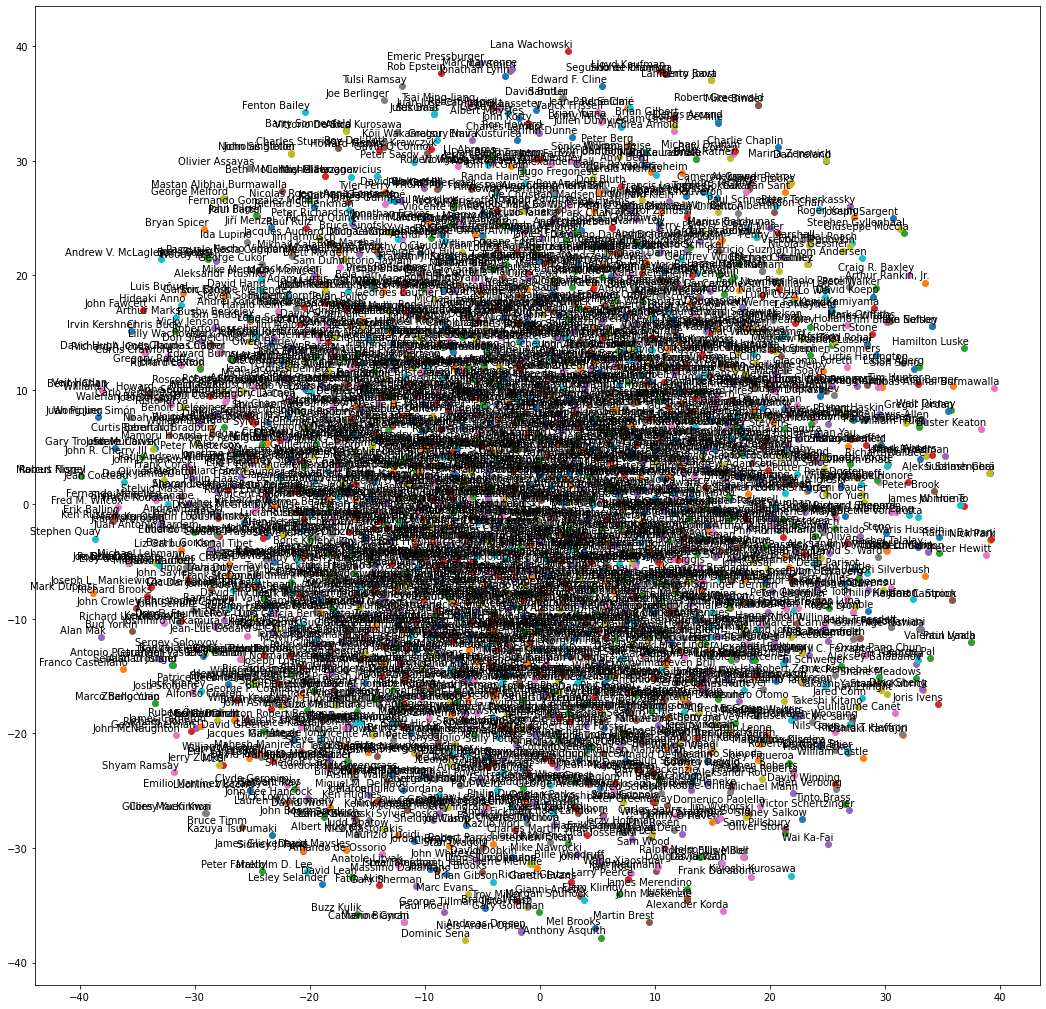

In [35]:
tsne_plot(crew_wtv)

### Overview of Data Cleaning

Here is an idea of what our cleaned dataframe total looks like.

In [36]:
total.head(5)

,budget,genres,id,original_language,overview,popularity,production_companies,production_countries,revenue,runtime,tagline,title,video,release_year,release_month,release_day,cast,crew,ROI,tmdbId,rating_count,rating_average,production_company,genre
0,30000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",862,en,"Led by Woody, Andy's toys live happily in his ...",21.946943,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",373554033.0,81.0,NaN,Toy Story,False,1995.0,10.0,30.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney...",[John Lasseter],1.145180e+01,862.0,66008,3.888157,[Pixar Animation Studios],"[Animation, Comedy, Family]"
1,65000000.0,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",8844,en,When siblings Judy and Peter discover an encha...,17.015539,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",262800000.0,104.0,Roll the dice and unleash the excitement!,Jumanji,False,1995.0,12.0,15.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,...",[Joe Johnston],3.043035e+00,8844.0,26060,3.236953,"[TriStar Pictures, Teitler Film, Interscope Co...","[Adventure, Fantasy, Family]"
2,0.0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",15602,en,A family wedding reignites the ancient feud be...,11.712900,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",0.0,101.0,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,1995.0,12.0,22.0,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop...",[Howard Deutch],-1.000000e+00,15602.0,15497,3.175550,"[Warner Bros., Lancaster Gate]","[Romance, Comedy]"
3,16000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",31357,en,"Cheated on, mistreated and stepped on, the wom...",3.859495,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",81452156.0,127.0,Friends are the people who let you be yourself...,Waiting to Exhale,False,1995.0,12.0,22.0,"[Whitney Houston, Angela Bassett, Loretta Devi...",[Forest Whitaker],4.090759e+00,31357.0,2981,2.875713,[Twentieth Century Fox Film Corporation],"[Comedy, Drama, Romance]"
4,0.0,"[{'id': 35, 'name': 'Comedy'}]",11862,en,Just when George Banks has recovered from his ...,8.387519,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",76578911.0,106.0,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,1995.0,2.0,10.0,"[Steve Martin, Diane Keaton, Martin Short, Kim...",[Charles Shyer],7.657891e+07,11862.0,15258,3.079565,"[Sandollar Productions, Touchstone Pictures]",[Comedy]


# **EDA**

In [37]:
from math import log
def logConvert(x):
  return log(x+1)

### Revenue

We see that the majority of the movies have a recorded revenue of 0, which indicate that the values are missing.   After scaping revenue information online, it still doesn not get better with missing value situation. So it will not be taken into consideration later as response variable.

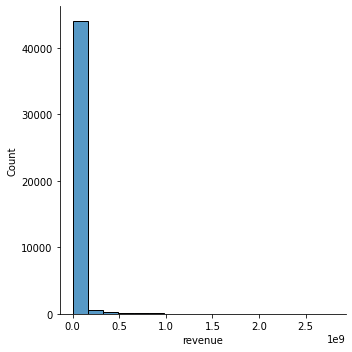

In [38]:
sns.displot(data=total, x = "revenue")

### ROI
Due to the heavily skewed revenue, our ROI is also skewed. There are lots of missing values as well. So it will not be taken into consideration later.

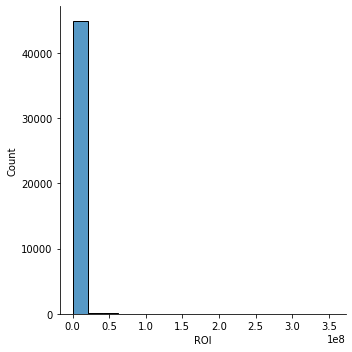

In [39]:
sns.displot(data=total, x = "ROI")

### Budget
Since there are also too much missing value in variable budget, and the distribution is too skewed. It does not get bettter after log transformation, so it will not be a good feature to use later on.

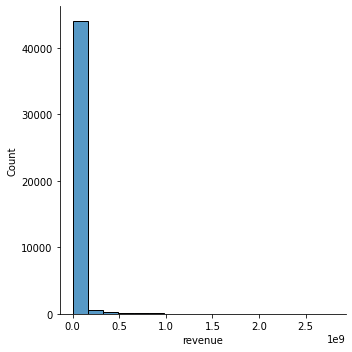

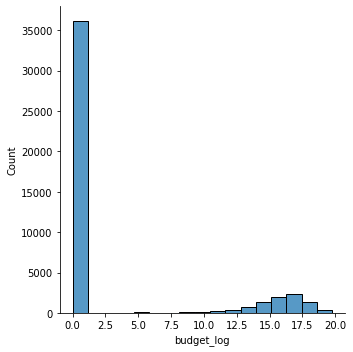

In [40]:
a = min(total['revenue'])
b = max(total['revenue'])
#sns.displot(data=total, x = "revenue", ax=ax1)
sns.displot(data=total, x = "revenue")

total['budget_log'] = total['budget'].apply(logConvert)
a = min(total['budget_log'])
b = max(total['budget_log'])
#sns.displot(data=total, x = "budget_log",ax=ax2)
sns.displot(data=total, x = "budget_log")

##Original Language
There are over 93 languages represented in our dataset. As we had expected, English language films form the overwhelmingly majority. French and Italian movies come at a very distant second and third respectively. 

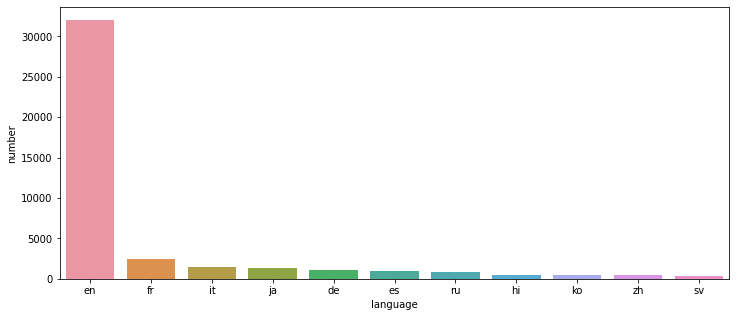

In [41]:
lang_df = pd.DataFrame(total['original_language'].value_counts())
lang_df['language'] = lang_df.index
lang_df.columns = ['number', 'language']
lang_df.head()

plt.figure(figsize=(12,5))
sns.barplot(x='language', y='number', data=lang_df.iloc[0:11])
plt.show()

## Runtime
There seems to be a moderate relationship between runtime and rating average score with a correlation 0.114. So we may keep this feature towards future modelling.

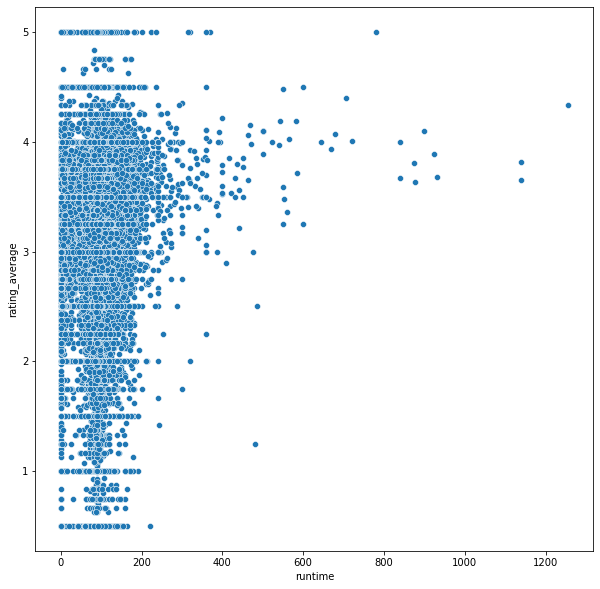

In [42]:
fig = plt.figure(figsize=(10,10)) 
sns.scatterplot(x="runtime", y="rating_average", data=total)

In [43]:
total.runtime.corr(total.rating_average)

0.11455763403007636

## Release Date

Based the below data visualization and correlation score, it seems that release year and date may not have much association with rating average since the correlation score is low.

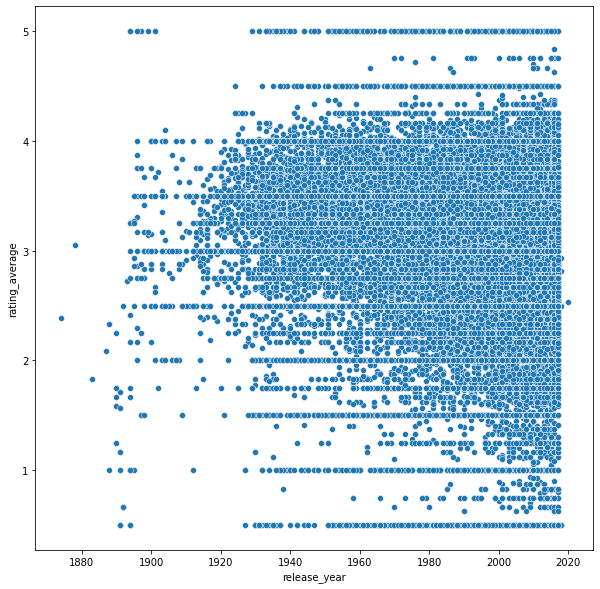

In [44]:
fig = plt.figure(figsize=(10,10)) 
sns.scatterplot(x="release_year", y="rating_average", data=total)

In [45]:
total.release_year.corr(total.rating_average)

-0.025653696126195637

In [46]:
total.release_day.corr(total.rating_average)

0.009427589053120444

## Proxy of Model: Rating Average and Rating Count

### Rating average as proxy for reputation
Again, we see a decent amount of movies report no vote averages. This will be as well taken into consideration. Also, this follows a nice normal distribution, so we will use rating_average a the proxy for measuring the reputation of movies. Good movies are usually spoken highly by people and thus have a high rating average. Thus, movies can be considered as successful if they have good reputation and are spoken highly by people.

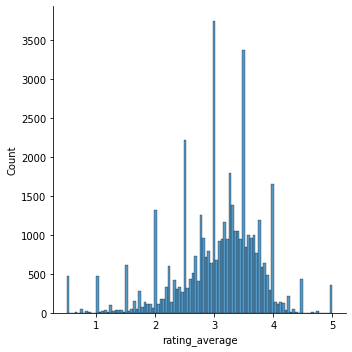

In [47]:
sns.displot(data=total, x = "rating_average")

In [48]:
total.rating_average.describe()

count    45254.000000
mean         3.061675
std          0.728564
min          0.500000
25%          2.697423
50%          3.166667
75%          3.500000
max          5.000000
Name: rating_average, dtype: float64

In [49]:
total["reputation"] = total["rating_average"].apply(lambda x: 1 if x >=3.5 else 0)

### Rating count as proxy for popularity/box office performance
As we know, sometimes those movies that are spoken highly are not necessarily the one with good box office performance. That box office performance is influence by lots of potential factors, such as popularity of actors, genres and so on. And it is not the same as whether it is a "good" movie or not. Thus, we need a different metric if we want to measure the box-office success of movies. Thus, it makes sense to use number of ratings from users to measure the box-office success of movies since large number of ratings means that large number of audience who have seen the movies. As we can see from the summary statistics, movies with rating count higher than 90% percentile all perform well on their revenue.

In [50]:
total["popular"] = total["rating_count"].apply(lambda x: 1 if x >=np.percentile(total.rating_count, 90) else 0)
total[total["rating_count"]>np.percentile(total.rating_count, 90)].revenue.describe()

count    4.525000e+03
mean     1.183358e+08
std      2.189034e+08
min      0.000000e+00
25%      1.800000e+06
50%      3.576360e+07
75%      1.313000e+08
max      2.788000e+09
Name: revenue, dtype: float64

Since our goal is to provide insights to movie investors, we would love to make the decision easier for people by defining success from two aspects: success on box office performance or success on reputation. Based on the distribution of rating, it makes sense to use 75% rating score as the threshold for success. In that case, average rating above 3.5 will be considered as successful on reputation. We will use 90% percentile on rating count as the threshold for successful on box office performance. The investors can use those two difference metrics on success to decide which movie to invest on based on their understanding.

## World Cloud
Are there certain words that figure more often in Movie Titles and Movie Blurbs? We suspect there are some words which are considered more potent and considered more worthy of a title.



### Overview

We visualized a word cloud on overview for those successful movies, either from reputation or from popularity, and some keywords showed include "life", "find", "family", "love", "live" etc. So future producers can consider maybe incluse those keywords when they come up with movie overviews.

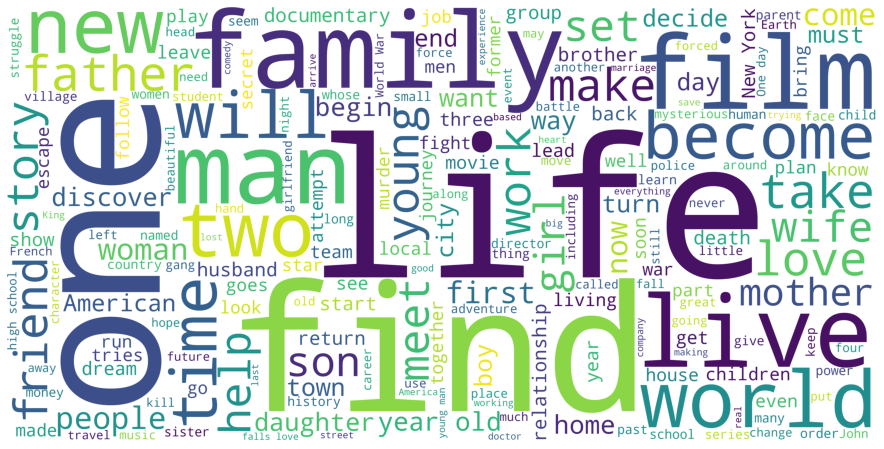

In [51]:
overview_corpus = ' '.join(total.loc[(total.reputation==1) | (total.popular==1) ,'overview'])
from wordcloud import WordCloud, STOPWORDS
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

### Title
The word Love is the most commonly used word in movie titles. Story, Girl, Day, world, life and Man are also among the most commonly occuring words. That shows how dominant romantic movies are in the industry.

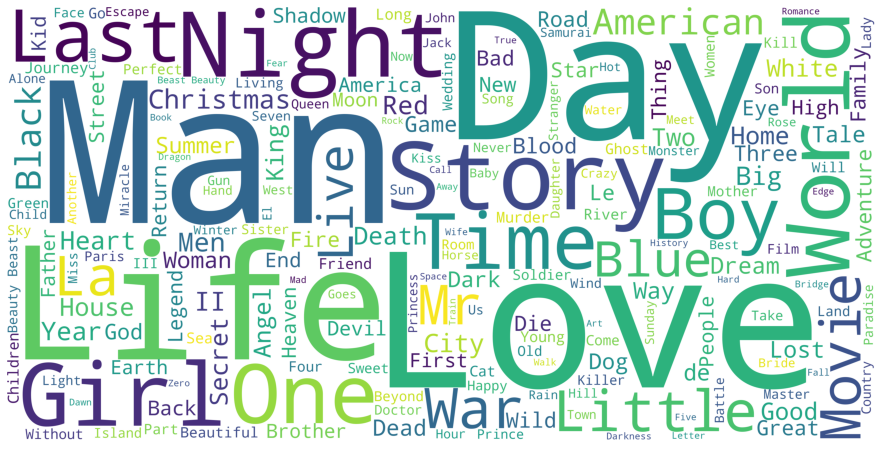

In [52]:
title_corpus = ' '.join(total.loc[(total.reputation==1) | (total.popular==1),'title'])
from wordcloud import WordCloud, STOPWORDS
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_corpus)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

## Genre
For this section, we want to take a closer look whether this is a relation between genre and the success level of movies. In another word, whether a movie in a certain genre will tend to have a better popularity (more voting) and a better reputation (higher voting).
 

In terms of reputation, as showed below, we can see that certain genres, such as documentary, history, and music, have an almost 1:1 ratio of well-reputed movies versus not-so-well-reputed movies. It is noteworthy that documentary is the only genre in which the amount of “good movies” exceeds the amount of “bad movie.” Some genres, in contrast, has a lower “reputed movies.” For example, the majority of the movies in genre horror and thriller is classified as 0 in our reputation computation.

Text(0.5, 1.0, '% of total movies per genre (1960-2020)')

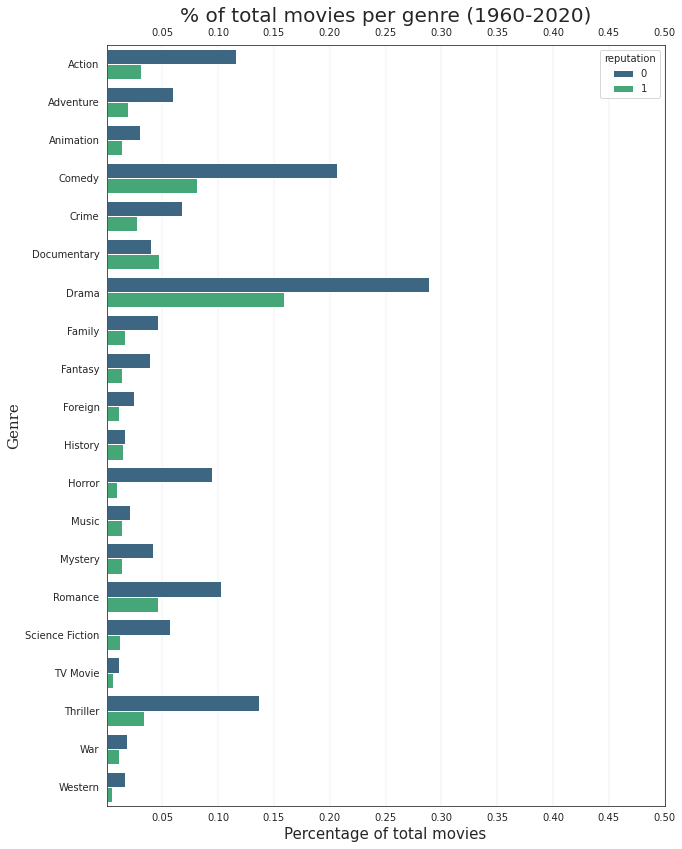

In [53]:
genre_df = total[["genre", "reputation", "id"]]
genre_df = genre_df.explode(column="genre")
genre_plot = genre_df.groupby(["genre", "reputation"]).count().reset_index()
genre_plot.columns = ["genre", "reputation", "count"]
genre_plot["perc"] = genre_plot["count"]/total.shape[0]

sns.set_style("white")
fig, ax = plt.subplots(figsize=(10,14))
ax = sns.barplot(y='genre', x='perc', hue='reputation', data=genre_plot, palette='viridis')
ax.grid(color='grey', linestyle='-', linewidth=0.1, axis='x')
ax.set_xticks([0.05, 0.10, .15, .20, .25, .30, .35, .40, .45, .50])
#ax.set_yticklabels(graph.genre[:23], size = 13, fontfamily='serif')
ax.set_xlabel('Percentage of total movies', fontsize=15)
ax.set_ylabel('Genre', fontsize=15, fontfamily='serif')
ax.tick_params(labelbottom=True,labeltop=True)
plt.title('% of total movies per genre (1960-2020)', fontsize=20)


In terms of popularity, as showed below, we noticed some completely different patterns compared to what we observed above - documentary genre, which performed extremely well in reputation, is generally not considered as popular. Intuitively, genres such as comedy, drama, and action tend to have a relatively higher ratio of “popular movies” versus “unpopular movies.”

Text(0.5, 1.0, '% of total movies per genre (1960-2020)')

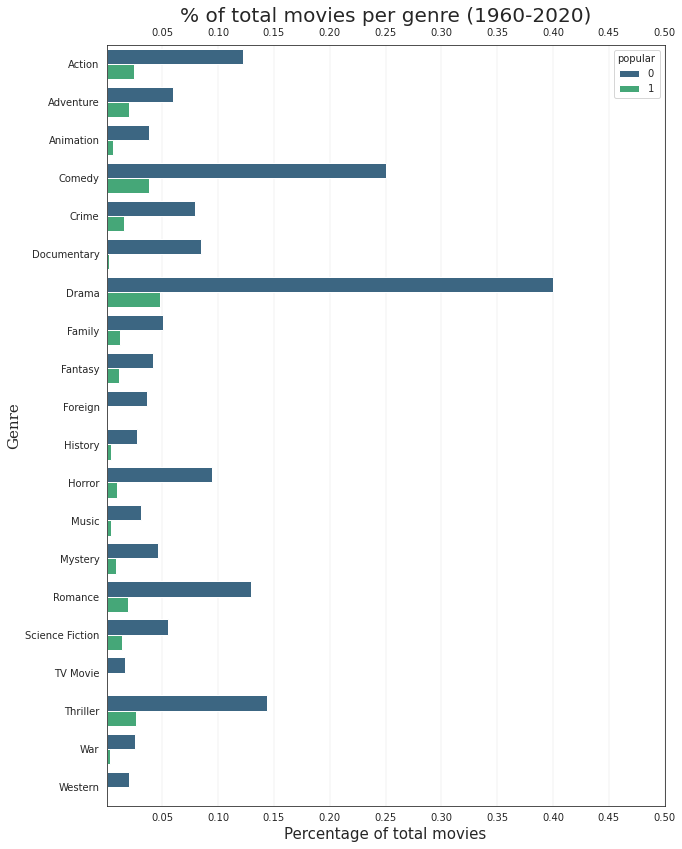

In [54]:
genre_df = total[["genre", "popular", "id"]]
genre_df = genre_df.explode(column="genre")
genre_plot = genre_df.groupby(["genre", "popular"]).count().reset_index()
genre_plot.columns = ["genre", "popular", "count"]
genre_plot["perc"] = genre_plot["count"]/total.shape[0]

sns.set_style("white")
fig, ax = plt.subplots(figsize=(10,14))
ax = sns.barplot(y='genre', x='perc', hue='popular', data=genre_plot, palette='viridis')
ax.grid(color='grey', linestyle='-', linewidth=0.1, axis='x')
ax.set_xticks([0.05, 0.10, .15, .20, .25, .30, .35, .40, .45, .50])
#ax.set_yticklabels(graph.genre[:23], size = 13, fontfamily='serif')
ax.set_xlabel('Percentage of total movies', fontsize=15)
ax.set_ylabel('Genre', fontsize=15, fontfamily='serif')
ax.tick_params(labelbottom=True,labeltop=True)
plt.title('% of total movies per genre (1960-2020)', fontsize=20)

#**Feature Engineering**

Below are steps to convert values stored in string to a vector: cast, crew, product company, genre, and run time using pipeline.

In [55]:
from sklearn.pipeline import make_pipeline, make_union
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_auc_score, f1_score, fbeta_score, precision_score, recall_score
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from sklearn.model_selection import ParameterGrid
from sklearn.base import BaseEstimator, TransformerMixin

In [56]:
class W2VFeatures(BaseEstimator, TransformerMixin):
    def __init__(self, wtv, category, min_cnt_movies):
        self.category = category
        self.min_cnt_movies = min_cnt_movies
        self.wtv = wtv

    def fit(self, X, y):
        self.default_vector = np.zeros(100)
        #self.default_vector = np.mean(wtv.wv.vectors, axis=0)
        return self
    
    def _get_vector(self, x_i):
        vectors = []
        for person in x_i[self.category]:
            if person not in self.wtv.wv or self.wtv.wv.vocab[person].count < self.min_cnt_movies: continue
            vectors.append(self.wtv.wv[person])
            
        if len(vectors) == 0:
            return self.default_vector
        else:
            return np.mean(vectors, axis=0)
            
    def transform(self, X):
        return np.asarray([self._get_vector(x_i) for x_i in X])

In [57]:
class runtime(BaseEstimator, TransformerMixin):
    def fit(self, X, y): return self
    def transform(self, X):
        vec = []
        for element in X:
            vec.append({'runtime': int(element['runtime'])})
        return vec

In [58]:
class genre(BaseEstimator, TransformerMixin):
    def fit(self, X, y): return self
    def transform(self, X):
        vec = []
        for element in X:
            vec.append({g: 1 for g in element['genre']})
        return vec  

In [59]:
"""
class releaseYear(BaseEstimator, TransformerMixin):
    def fit(self, X, y): return self
    def transform(self, X):
        vec = []
        for element in X:
            vec.append({'release_year': int(element['release_year'])})
        return vec
"""

"\nclass releaseYear(BaseEstimator, TransformerMixin):\n    def fit(self, X, y): return self\n    def transform(self, X):\n        vec = []\n        for element in X:\n            vec.append({'release_year': int(element['release_year'])})\n        return vec\n"

In [60]:
steps = []
steps.append(make_pipeline(W2VFeatures(pc_wtv, category='production_company', min_cnt_movies=3)))
steps.append(make_pipeline(W2VFeatures(crew_wtv, category='crew', min_cnt_movies=3)))
steps.append(make_pipeline(W2VFeatures(cast_wtv, category='cast', min_cnt_movies=3)))
steps.append(make_pipeline(runtime(), DictVectorizer(sparse=False)))
steps.append(make_pipeline(genre(), DictVectorizer(sparse=False)))
features_pipe = make_union(*steps)

In [61]:
total["cast"] = total["cast"].fillna(value = "[unknown]")
total["crew"] = total["crew"].fillna(value = "[unknown]")
total["production_company"] = total["production_company"].fillna(value = "[unknown]")
total["genre"] = total["genre"].fillna(value = "[unknown]")
total["runtime"] = total["runtime"].fillna(total['rating_average'].mean())

We also created some features that we think are crucial.

The months of May, June, July, December, and January are months during either Christmas or Summer, which is the most popular time for people to go see a movie. Thus we want to highlight that by creating is_holiday.

Genres defines what a movie is. While the actual genre is important, the number of them can also show something about a movie. 

In [62]:
#vote_average fillna, since only a few are missing, no indicator column needed
total['rating_average'] = total['rating_average'].fillna(total['rating_average'].mean())

#holidays: summer chirstmas thanksgiving etc
total['is_Holiday'] = total['release_month'].apply(lambda x: 1 if x in [ 'May', 'Jun','July', 'Dec','Jan'] else 0)

#fill runtime na and add indicator column
# total['runtime_missing']=total.isnull(total['runtime'])
total['runtime'] = total['runtime'].fillna(total['runtime'].mean())

#add number of genres
total['genres_count'] = total['genres'].apply(lambda x: len(x))

# **Modelling**
Now, after visualizing and cleaning the data, we now try to predict the average ratings for movies.

## Regression

In regression session, we will try to implement 3 machine learning methods to predict the continuous variables--linear regression, random forest, and gradient boosting and see the performance of three models in this project.

First of all, we want to use linear regression to predict the average rating. Linear regression is a common used method for predicting continuous response variables. It is a simple and computationally efficient. Also, the output is easy to be interpreted. However, linear regression may not be able to determine feature importance and will be adversely impacted by outliers. Also, the dependent variables may not linearly correlate to independent variales. Thus, linear regression will likely to perform less well in our project. 

Second, we intend to use random forest regressor. Random Forests train each decision tree independently with only a random sample of the data. Random Forest is able to handle large data sets with higher dimensionality. Moreover, random forest involves sampling of the input data with replacement called as bootstrap sampling. It will help with overfitting. However, random forest regressor may not work as well as random forest classifier since it doesn't predict beyond the range in the training data.

Last but not least, we will use gradient boosting regressor. GB builds an additive model in a forward stage-wise fashion. In each stage, it will do optimization for differentiable loss functions. In each stage GB build a tree and each new tree helps to correct errors made by previously trained tree. GB generally takes longer time to train and training results are usually better since it grows trees sequentially and is able to learn from "previous mistakes".


### Regression to predict reputation (rating_average)

In [63]:
features = total.drop(columns=["rating_average"])
label = total[["rating_average"]].values



#### Linear Regression

After splitting the data to training and testing, we create a pipeline defined previously to handle the data. 

We first used a linear regression to serve as baseline.

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import math

In [65]:
x_train, x_test, y_train, y_test = train_test_split(features, label, test_size = 0.2)
train_docs = x_train.to_dict(orient='records')
test_docs = x_test.to_dict(orient='records')

In [66]:
from sklearn.linear_model import LinearRegression
lm = make_pipeline(features_pipe, StandardScaler(), LinearRegression())
lm.fit(train_docs, y_train)

Pipeline(memory=None,
         steps=[('featureunion',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('pipeline-1',
                                                 Pipeline(memory=None,
                                                          steps=[('w2vfeatures',
                                                                  W2VFeatures(category='production_company',
                                                                              min_cnt_movies=3,
                                                                              wtv=<gensim.models.word2vec.Word2Vec object at 0x7f0d9c3f7940>))],
                                                          verbose=False)),
                                                ('pipeline-2',
                                                 Pipeline(memory=None,
                                                          steps=[('w2vfeatures',
                                               

A linear model does not fit well with our data, which is expected, since a complicated real-wrold relationship like this should not be linear at all. 

In [67]:
lm_test = lm.predict(test_docs)
print("The MSE of the linear model " + str(round(mean_squared_error(y_test, lm_test), 3)))

The MSE of the linear model 0.48


With MSE 0.48, the performance on predicting the average rating is not so bad. Let's use other machine learning methods to see if there will be improvement.

#### Random Forest Regressor

We now try Random Forest with our data.
Because Random Forest Bagging, we don't have to worry about overfitting, which is extremely helpful considering there might be a lot of noise in the data. 

In [68]:
%time
from sklearn.ensemble import RandomForestRegressor
rf = make_pipeline(features_pipe, StandardScaler(), RandomForestRegressor(max_depth=5,min_samples_split=100))
rf.fit(train_docs, y_train)


CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 6.44 µs


Pipeline(memory=None,
         steps=[('featureunion',
                 FeatureUnion(n_jobs=None,
                              transformer_list=[('pipeline-1',
                                                 Pipeline(memory=None,
                                                          steps=[('w2vfeatures',
                                                                  W2VFeatures(category='production_company',
                                                                              min_cnt_movies=3,
                                                                              wtv=<gensim.models.word2vec.Word2Vec object at 0x7f0d9c3f7940>))],
                                                          verbose=False)),
                                                ('pipeline-2',
                                                 Pipeline(memory=None,
                                                          steps=[('w2vfeatures',
                                               

In [69]:
rm_test = rf.predict(test_docs)
print("The MSE of random forest is " + str(round(mean_squared_error(y_test, rm_test), 3)))
if mean_squared_error(y_test, rm_test) < mean_squared_error(y_test, lm_test):
  print("The MSE of random forest is smaller than linear model, so the performance improves in terms of MSE")
else: 
  print("The MSE of random forest is bigger than linear model, so the performance does not improve in terms of MSE")

The MSE of random forest is 0.479
The MSE of random forest is smaller than linear model, so the performance improves in terms of MSE


#### Gradient Boosting regressor

In [70]:
from sklearn.ensemble import GradientBoostingRegressor

gd = make_pipeline(features_pipe, StandardScaler(), GradientBoostingRegressor(max_depth=5,min_samples_split=100))
gd.fit(train_docs, y_train)
gd.score(test_docs, y_test)
gd_test = gd.predict(test_docs)

In [71]:
print("The MSE of gradient boosting is " + str(round(mean_squared_error(y_test, gd_test), 3)))
if mean_squared_error(y_test, gd_test) < mean_squared_error(y_test, rm_test):
  print("The MSE of gradient boosting is smaller than random forest, so the performance improves in terms of MSE")
else: 
  print("The MSE of gradient boosting is bigger than random forest, so the performance does not improve in terms of MSE")

The MSE of gradient boosting is 0.456
The MSE of gradient boosting is smaller than random forest, so the performance improves in terms of MSE


### Regression to predict popularity (rating_count)

Since the standard deviation on the distribution of rating count is big, it would not make sense to do regression on rating count. And the performance will not be satisfying. As we can notice, after we try to do log transformation, it still does not get better: still very skewed to right. So, instead, we will do classification on popularity (rating count) to provide insights on success of movie popularity.

In [72]:
total.rating_count.describe()

count    45254.000000
mean       624.642661
std       3241.032593
min          1.000000
25%          2.000000
50%          8.000000
75%         72.000000
max      91921.000000
Name: rating_count, dtype: float64

In [73]:
total["log_ratingCount"] = total["rating_count"].apply(lambda x: log(x))

In [74]:
total["log_ratingCount"].describe()

count    45254.000000
mean         2.781945
std          2.494364
min          0.000000
25%          0.693147
50%          2.079442
75%          4.276666
max         11.428685
Name: log_ratingCount, dtype: float64

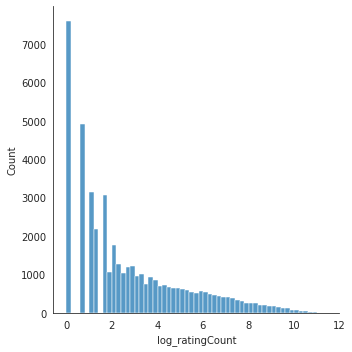

In [75]:
sns.displot(data=total, x = "log_ratingCount")

## Classification


Similaryly, we will perform the following three methods for predict the success in terms of rating average(reputation) and rating count (popularity).  

Logistic Regression:
Logistic regression is really easy to interpret, and it makes no assumptions about distributions of classes in feature space. However, since logistic regression does not provide high accuracy since our data is fairly complicated and there are a lot of dimensions, hence, in our case, it serves as the baseline for all models.


Random Forest:
Random forest has the power to handle large datasets with higher dimensionality. It can work with a large number of variables and identify the most significant ones, which fits our project the best. Also, random forest is effective even with missing data, which may happen in our dataset. The nature of random forest can also provide a more robust model and less likely to overfit on training data.


Gradient Boosting:
Gradient boosting has the best performance of all models that we adopted, since it corrects its previous errors by tuning the weights for every incorrect observation in every iteration. However, it’s noteworthy that if we modify our feature set or training set slightly, gradient boosting may produce a huge change in our result model.

In [76]:
# Function to plot a confusion matrix 
from sklearn.metrics import confusion_matrix

def conf_matrix(true, pred):    
    con_mat = confusion_matrix(true, pred)
    con_mat = pd.DataFrame(con_mat, range(2), range(2))
   
    plt.figure(figsize=(6,6))
    sns.set(font_scale=1.5) 
    sns.heatmap(con_mat, annot=True, annot_kws={"size": 16}, fmt='g', cmap='Blues', cbar=False)
    plt.xlabel("Predicted Value")
    plt.ylabel("Actual Value") 

### Predict success based on reputation

#### Logistic regression

In [77]:
features_classification = total.drop(columns= ["rating_average", "rating_count", "reputation", "popular"])
label_classification = total[["reputation"]].values

In [78]:
x_train_class, x_test_class, y_train_class, y_test_class = train_test_split(features_classification, label_classification, test_size = 0.2)
train_class = x_train_class.to_dict(orient='records')
test_class = x_test_class.to_dict(orient='records')

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lg = make_pipeline(features_pipe, LogisticRegression(class_weight='balanced'))
lg.fit(train_class, y_train_class)
lg_predictions = lg.predict(test_class)
print("The accuracy score using random forest to predict the success in terms of reputation is " + str(round(accuracy_score(y_test_class, lg_predictions), 3)))

The accuracy score using random forest to predict the success in terms of reputation is 0.609


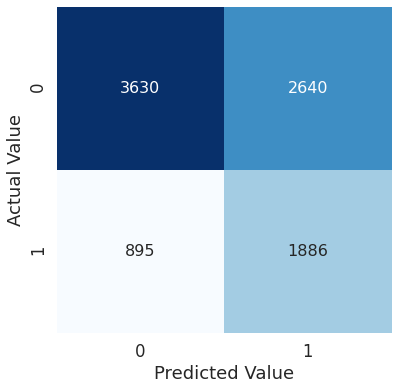

In [81]:
conf_matrix(y_test_class, lg_predictions)

#### random forest classifier

In [82]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier

rf_class = make_pipeline(features_pipe, RandomForestClassifier(class_weight = "balanced"))
rf_class.fit(train_class, y_train_class)
rf_class_predictions = rf_class.predict(test_class)

In [83]:
print("The accuracy score using random forest to predict the success in terms of reputation is " + str(round(accuracy_score(y_test_class, rf_class_predictions), 3)))

The accuracy score using random forest to predict the success in terms of reputation is 0.702


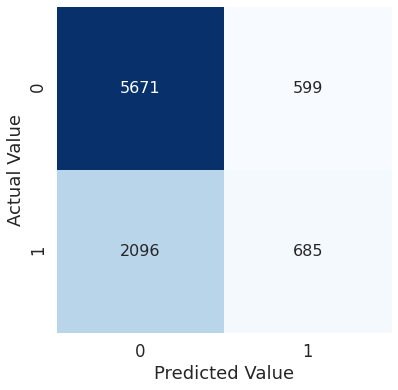

In [84]:
conf_matrix(y_test_class, rf_class_predictions)

#### Gradient Boosting Classifier


In [85]:
from sklearn.ensemble import GradientBoostingClassifier

gb_class = make_pipeline(features_pipe, GradientBoostingClassifier())
gb_class.fit(train_class, y_train_class)
gb_class_predictions = gb_class.predict(test_class)
print("The accuracy score using Gradient Boosting to predict the success in terms of reputation is " + str(round(accuracy_score(y_test_class, gb_class_predictions), 3)))

The accuracy score using Gradient Boosting to predict the success in terms of reputation is 0.705


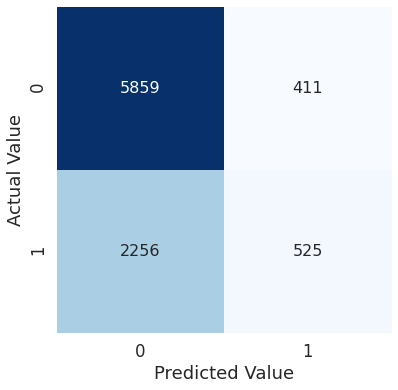

In [86]:
conf_matrix(y_test_class, gb_class_predictions)

### Predict success based on popularity

In [87]:
features_popular = total.drop(columns= ["rating_average", "rating_count", "reputation", "popular"])
label_popular = total[["popular"]].values

x_train_popular, x_test_popular, y_train_popular, y_test_popular = train_test_split(features_popular, label_popular, test_size = 0.2)
train_popular = x_train_popular.to_dict(orient='records')
test_popular = x_test_popular.to_dict(orient='records')

#### Logistic Regression

In [88]:
lg_popular = make_pipeline(features_pipe, LogisticRegression(class_weight='balanced'))
lg_popular.fit(train_popular, y_train_popular)
lg_popular_pred = lg.predict(test_popular)
print("The accuracy score using random forest to predict the success in terms of reputation is " + str(round(accuracy_score(y_test_popular, lg_popular_pred), 3)))

The accuracy score using random forest to predict the success in terms of reputation is 0.471


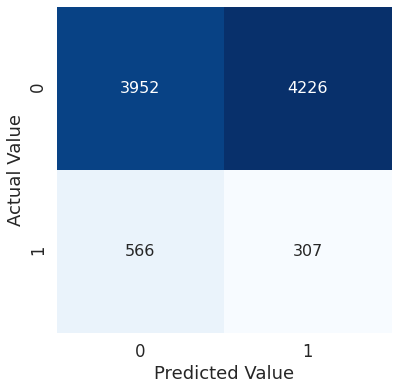

In [89]:
conf_matrix(y_test_popular, lg_popular_pred)

#### random forest classifier

In [90]:
rf_popular = make_pipeline(features_pipe, RandomForestClassifier(class_weight='balanced'))
rf_popular.fit(train_popular, y_train_popular)
rf_popular_pred = rf_class.predict(test_popular)
print("The accuracy score using random forest to predict the success in terms of reputation is " + str(round(accuracy_score(y_test_popular, rf_popular_pred), 3)))

The accuracy score using random forest to predict the success in terms of reputation is 0.691


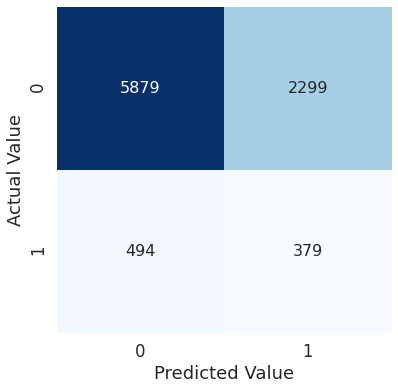

In [91]:
conf_matrix(y_test_popular, rf_popular_pred)

#### Gradient Boosting Classifier

In [92]:
from sklearn.ensemble import GradientBoostingClassifier

gb_popular = make_pipeline(features_pipe, GradientBoostingClassifier())
gb_popular.fit(train_popular, y_train_popular)
gb_popular_pred = gb_popular.predict(test_popular)
print("The accuracy score using Gradient Boosting to predict the success in terms of reputation is " + str(round(accuracy_score(y_test_popular, gb_popular_pred), 3)))

The accuracy score using Gradient Boosting to predict the success in terms of reputation is 0.924


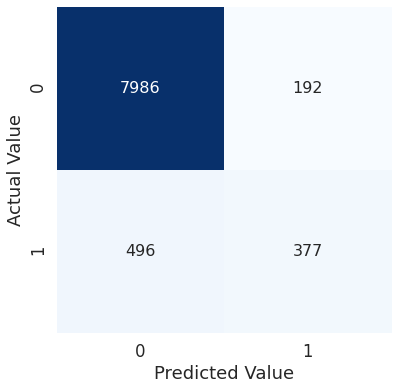

In [93]:
conf_matrix(y_test_popular, gb_popular_pred)

#**Conclusion**

After conducting experiments on serveral models, we decided that model worked the best for this dataset is gradient boosting. In either regression or classification problem, it has the best performance. In regression, when we try to predict the reputation and popularity for the movies, gradient boosting has the lowest the MSE, thus best performance among the three models(linear regression, random forest, and gradient boosting). In classification, when we try to predict whether a movie can be deemed as "successful" in terms of reputation and popularity, gradient boosting has the best accuracy score, thus best performance among the three models(logistic regression, random forest, and gradient boosting). Also, in the classification, we have imbalance class issue. We deal with this issue by adding balance weight in logistic regression and random forest classifier. Gradient Boosting deals with class imbalance by constructing successive training sets based on incorrectly classified examples. Therefore, gradient boosting outperforms Random Forest and logistics regression on imbalanced dataset. And we decided to use gradient boosting as our final model in both regression task and classification task.

For regression task to predict average rating, the MSE of gradient boosting achieves as low as 0.456.

For classification task to predict whether the movie is successful on reputation, the gradient boosting classifier achieves the accuracy score as high as 70.5%.

For classification task to predict whether the movie is successful on popularity, the gradient boosting classifier achieves the accuracy score as high as 92.4%.

Throughout the analysis in this project, we have provided relevant business insights for movie investors. And we define the movie success from two dimensions: reputation and popularity. High reputation means movies deliver the content that audience speak highly of. So movies with high reputations can be seen as successful. Movies with lots of number of ratings can also be seen as successful since that means the number of audience is a lot. In other words, movies with more number of ratings are more popular.

With our model, the investors can choose the one dimension they care more about, from two dimensions: popularity or reputation, and then predict whether the movie they intend to invest will be successful in that dimension. The decision making process for movie investors will be easier with those data-driven insights. 



##Challenges

The main challenge that we had is to decide what should be the proxy of our project. At the beginning, we thought revenue would be a great proxy (label), since it is intuitively reasonable to say that “a movie is successful if it generated good revenue streams.” However, this idea was negated after we took a closer at our data - a majority of our data entries did not include revenue records, and, even with other external datasets included, our dataset was still unable to feed enough data to our models.

To solve this problem, we then started using rating as our proxy. There are 2 values that we used as labels, rating count (number of ratings), and rating average (the mean of all ratings). However, even though we have enough data in rating_df, it naturally turns out that the popular movies have lots of rating count, and the corresponding rating score is fairly accurate; movies that are not popular generally have only around 1 to 50 votes, and the rating average generated by this small rating subset is, in our mind, not as accurate. For these unpopular movies, the rating is often biased and either composed of all bad ratings from people who are mad about the movie, or fans who just try to boost the score. One potential solution we thought about is to select only movies that have a larger amount of ratings, but such method will decrease the size of our database by a lot. Hence, we did not implement such method.


##Future Direction

Some things we would want to improve on are NLP on overview, title, and keywords. It would be helpful to see if an interesting title or overview would bring more audience to the theater or improve their watching experience. For example, Pulp Fiction sounds not related to its content at all, yet became a very significant figure in its story-telling. We hope to retrieve more information during this NLP process.

Another thing we would love to work on in the future is to gain more data on movies. For example, if we can gather more information on movie’s revenue, we can work on a model that tries to predict the relationship between our features and revenue. Actors and actresses’ yearly income is another area that we wish to have more data on - people tend to show up to movies with big names, and yearly income can be an effective measure to an actor/actress’ star power.